In [1]:
column = "rate"

In [2]:
import os

import numpy  as np

import matplotlib.pyplot as plt

from CCio   import load_hdf

from CCcore import filter_df
from CCcore import fix_hot_pixel
from CCcore import remove_duplicate_grating
from CCcore import rebin_df

from CCplot import change_jupyter_width
from CCplot import auto_plot_style
from CCplot import figure
from CCplot import subplot
from CCplot import plot1d
from CCplot import plot2d

In [3]:
exec(change_jupyter_width(90))

In [4]:
%matplotlib inline

auto_plot_style()

In [5]:
filename  = "/home/gonzalo/data/CC/pre-annealing-experiment/scan_irrad5_MgF_B3_480_2021_07_26_15_59_47_127000.h5"
crystal   = os.path.basename(filename).split("_")[2]
data      = load_hdf(filename, crystal)
data      = fix_hot_pixel(data)
data      = remove_duplicate_grating(data)
exposures = sorted(data.exposure.drop_duplicates())

/home/gonzalo/sw/git/CC/CCcore.py:32: RuntimeWarning: invalid value encountered in greater_equal
  if low  is not None: sel &= x >= low
/home/gonzalo/sw/git/CC/CCcore.py:33: RuntimeWarning: invalid value encountered in less
  if high is not None: sel &= x <  high
/home/gonzalo/sw/anaconda3/envs/CC/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


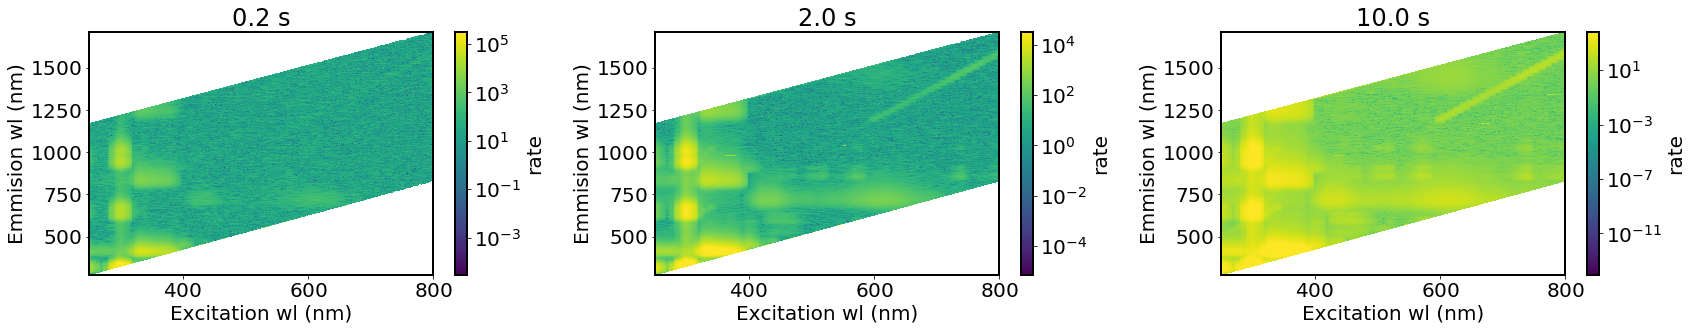

In [46]:
plt.figure(figsize=(24, 5))

for k, exposure in enumerate(exposures, start=1):
    subplot(len(exposures), k)
    
    df       = filter_df(data, exposure=exposure)
    spectrum = df.loc[:, column]

    s, c = plot2d(df.ex_wl, df.em_wl, spectrum, title=f"{exposure:.1f} s"
                 , log=True, zlabel=column
                 , cmin=np.percentile(spectrum, 5), cmax=spectrum.max())    

plt.tight_layout()

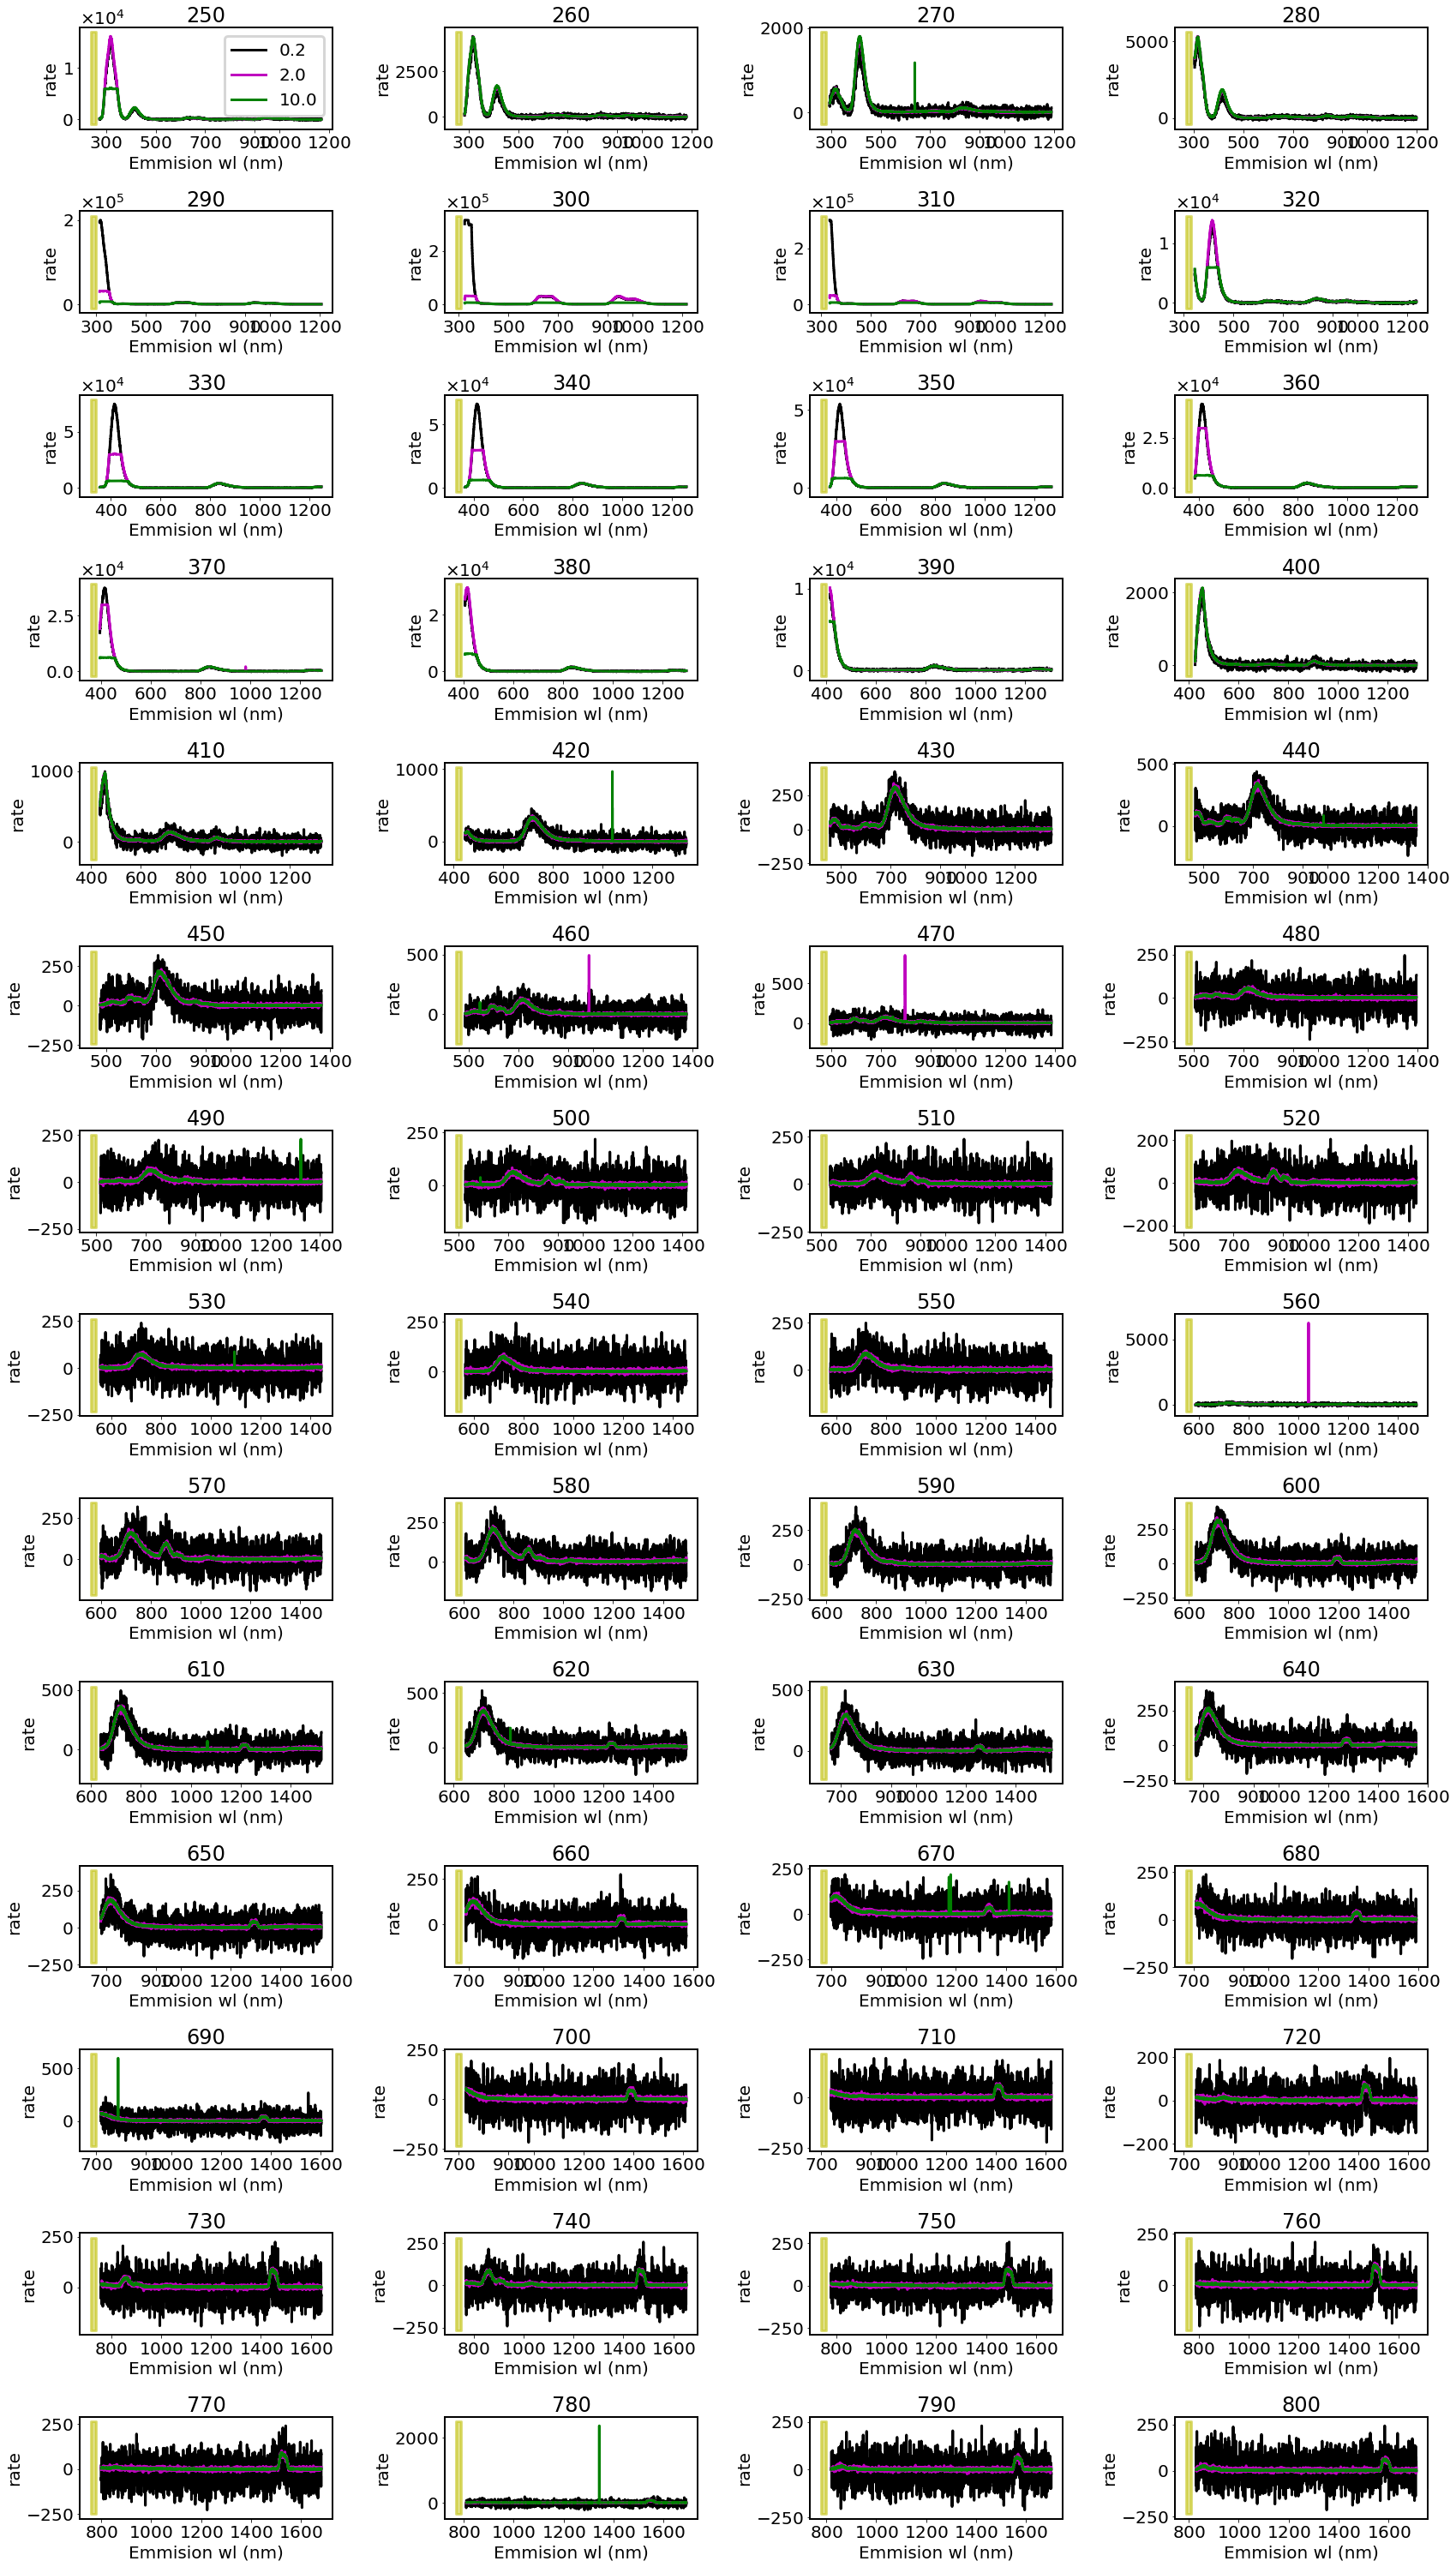

In [47]:
plt.figure(figsize=(6*4, 3*14))
for ex_wl, exdf in data.groupby("ex_wl"):
    plt.subplot(14, 4, (ex_wl - 240) // 10)
    for exposure in exposures:
        df        = filter_df(exdf, exposure = exposure)
        spectrum  = df.loc[:, column]
        plot1d(df.em_wl, spectrum, title=str(ex_wl), ylabel=column, label=f"{exposure:.1f}")

    plt.fill_betweenx(plt.ylim(), ex_wl - 10, ex_wl + 10, color="y", alpha=0.5)

    wlmin = np.round(df.em_wl.min(), -2)
    wlmax = np.round(df.em_wl.max(), -2) + 1
    ticks = np.concatenate([ np.arange(wlmin, 1000, 200)
                           , np.arange(1000, wlmax, 200)])

    plt.xticks(ticks)
    
    if ex_wl == 250:
        plt.legend()

plt.tight_layout()

In [7]:
def ticks(wls):
    min = np.ceil (wls.min() / 100) * 100
    max = np.floor(wls.max() / 100) * 100
    return np.arange(min, max + 1, 100)

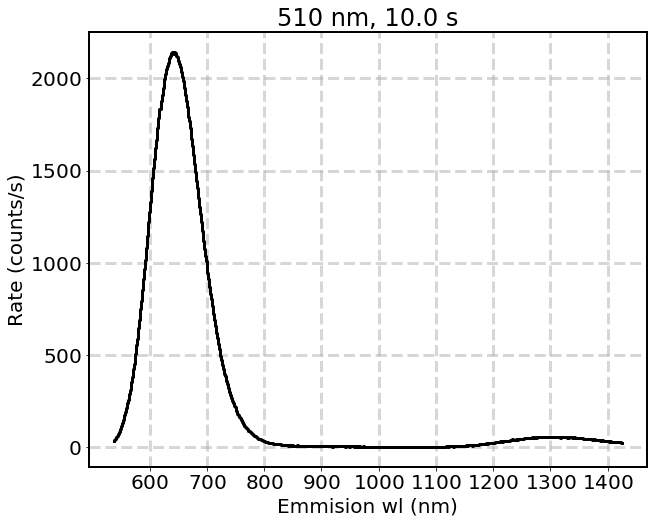

In [14]:
exposure = 10
ex_wl    = 510
rebin    = 4
grating  = 1 + int(ex_wl >= 400)
df       = filter_df(data, exposure=exposure, ex_wl=ex_wl, grating_mono=grating)
df       = rebin_df(df, rebin)

plt.figure(figsize=(10, 8))
plot1d(df.em_wl, df.rate, ylabel="Rate (counts/s)")
plt.title(f"{ex_wl} nm, {exposure:.1f} s")
plt.grid()
plt.xticks(ticks(df.em_wl))
#plt.ylim(-5, 40)
#plt.legend()
pass